<h1><center><b>Import Libraries and Read Data</b></center><h1>

In [1]:
# Import Libraries

# df.describe(include='all'), statistics of all columns

# df.describe()

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [10]:
# Read the data

df = pd.read_csv(r'C:\Users\Cody\Desktop\expenses.csv', header = 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h1><center><b>Data Cleaning</b></center><h1>

In [3]:
# trying to see how many rows of data are in this dataset
df.shape

(1338, 7)

**In this case, there is no need to remove duplicates because although it's rare, it's still possible for someone to have the same age, sex, bmi, children, smoker, region, and charges. None of the columns from this dataset is unique. But if it does, I can remove the duplicates using the following code:**

In [4]:
# df = df.drop_duplicates()
# df.shape

In [5]:
# Trying to see if all data are filled in

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

age - 0.0%
sex - 0.0%
bmi - 0.0%
children - 0.0%
smoker - 0.0%
region - 0.0%
charges - 0.0%


**In this case, there aren't null values. But if it does, then I can drop it with the following code:**

In [6]:
# df.dropna(axis = 'index', how = 'any', subset = ['charges'])

**Instruction on how to use this:**
1. when you set the 'Axis' to index, it will drop null values in rows. When you set the 'Axis' to columns, it will drop columns.
2. When you set 'How' to all, the null values will be dropped when all the values are missing. When you set 'How' to any, the na values will be dropped when any the values are missing.
3. When you set 'Subset' to a specific column, it will only check that column. It will show rows with at least their email address filled in.
4. You can check multiple columns using subset = ['charges', 'age']

<h1><center><b>Correlation Analysis</b></center><h1>

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
# Trying to include the correlation from non-numeric columns.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
# This is the original data, you can see how it transformed the non-numeric data to numeric data.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<h1><center><b>Visualizing Correlation</b></center><h1>

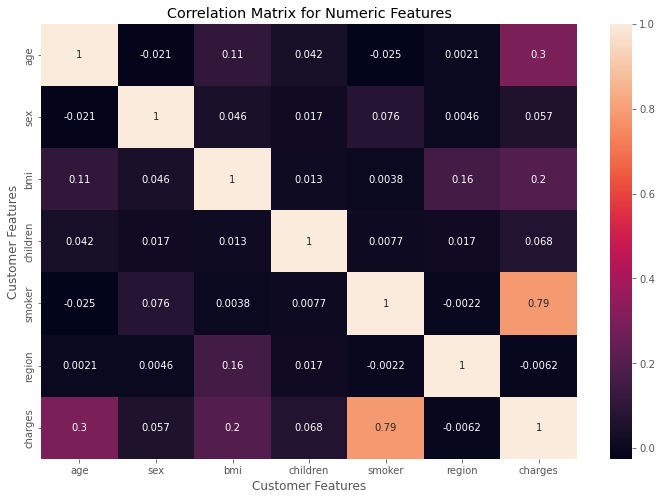

In [14]:
#It shows correlation between charges/revenue in respect to different target customer profiles.
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Customer Features')

plt.ylabel('Customer Features')

plt.show()

Text(0, 0.5, 'charges')

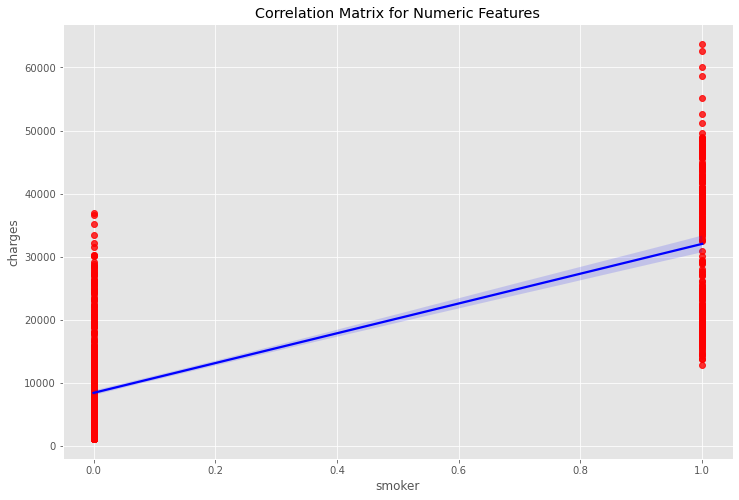

In [15]:
# It seems like smoker and charges are most correlated.
# Let's create a graph to visualize the relationship between 'smoker' and 'charges'.
sns.regplot (x = 'smoker', y = 'charges', data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "Blue"})

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('smoker')

plt.ylabel('charges')

In [16]:
# A faster way to see the correlation
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(ascending = False)

sorted_pairs


age       age         1.000000
sex       sex         1.000000
region    region      1.000000
smoker    smoker      1.000000
bmi       bmi         1.000000
children  children    1.000000
charges   charges     1.000000
smoker    charges     0.787251
charges   smoker      0.787251
          age         0.299008
age       charges     0.299008
bmi       charges     0.198341
charges   bmi         0.198341
region    bmi         0.157566
bmi       region      0.157566
          age         0.109272
age       bmi         0.109272
sex       smoker      0.076185
smoker    sex         0.076185
charges   children    0.067998
children  charges     0.067998
sex       charges     0.057292
charges   sex         0.057292
bmi       sex         0.046371
sex       bmi         0.046371
children  age         0.042469
age       children    0.042469
sex       children    0.017163
children  sex         0.017163
          region      0.016569
region    children    0.016569
bmi       children    0.012759
children

In [17]:
# if the correction is higher than 0.5, I consider it as highly correlated.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

age       age         1.000000
sex       sex         1.000000
region    region      1.000000
smoker    smoker      1.000000
bmi       bmi         1.000000
children  children    1.000000
charges   charges     1.000000
smoker    charges     0.787251
charges   smoker      0.787251
dtype: float64

<h1><center><b>Conclusion</b></center><h1>
Whether or not a consumer is a smoker has about 79% correlation to the company's revenue and the consumer's age has about 30% correlation to the company's revenue. I'm aware that just because there is correlation, it doesn't necessarily indicate there is causation.